# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

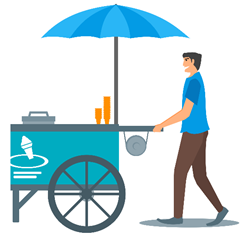

# STEP #1: LIBRARIES IMPORT


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [50]:
IceCream = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Ice%20Cream.csv")


In [51]:
IceCream.head(100)

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317
...,...,...
95,9.1,213
96,20.3,475
97,19.4,461
98,14.7,344


In [52]:
IceCream.tail()

,Temperature,Revenue
495,22.3,525
496,32.9,756
497,12.6,307
498,22.4,567
499,29.0,656


In [53]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [54]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

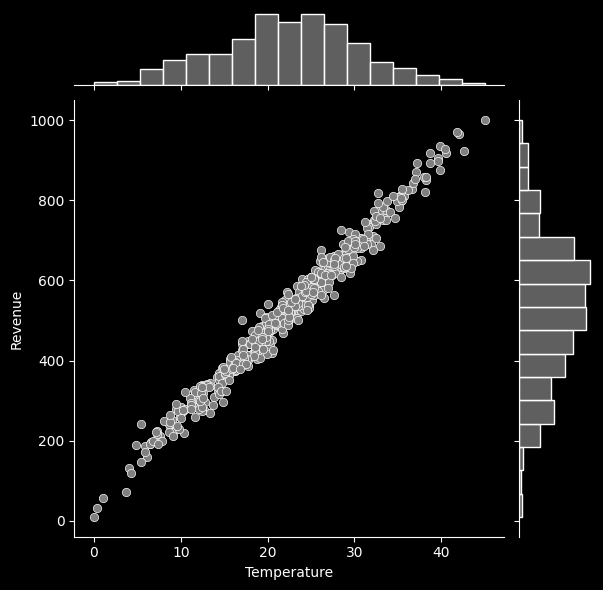

In [55]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

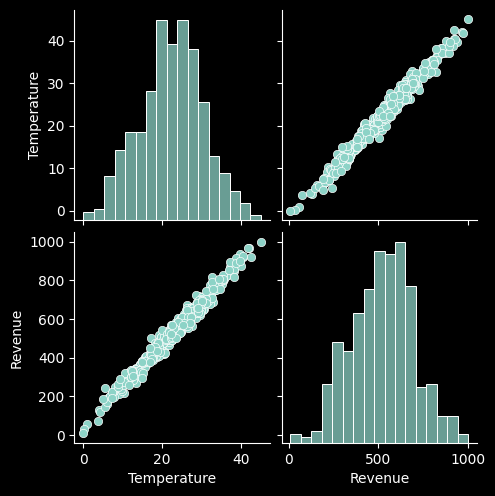

In [56]:
sns.pairplot(IceCream)

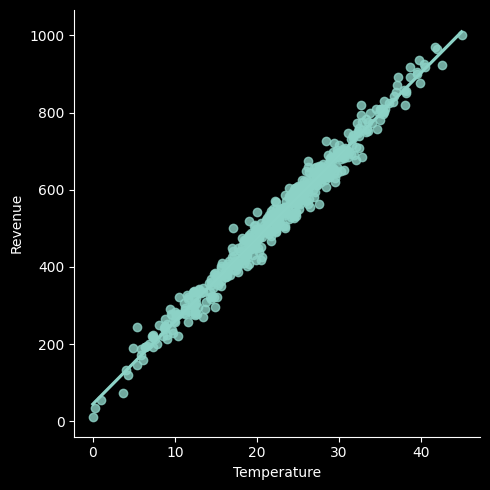

In [57]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [58]:
y = IceCream['Revenue']

In [59]:
X = IceCream[['Temperature']]

In [60]:
X

,Temperature
0,24.6
1,26.1
2,27.8
3,20.6
4,11.6
...,...
495,22.3
496,32.9
497,12.6
498,22.4


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [63]:
X_train.shape

(375, 1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
regressor = LinearRegression(fit_intercept = True)

In [66]:
regressor.fit(X_train,y_train)

LinearRegression()

In [67]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Intercept (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.4615429]
Linear Model Intercept (b):  43.69134606637556


# STEP#6: TEST THE MODEL 

In [68]:
y_predict = regressor.predict(X_test)
y_predict

array([ 520.13759837,  689.68378725,  601.69146138,  129.53751765,
        451.4606611 , 1009.46077641,  893.56844477,  670.36839865,
        809.86842747,  135.97598052,  442.87604394,  262.59908361,
        485.79912974,  548.03760414,  217.52984353,  326.9837123 ,
        696.12225012,  350.59140949,  236.84523214,  713.29148444,
        651.05301004,  659.6376272 ,  492.2375926 ,  485.79912974,
        404.24526673,  569.49914703,  449.31450681,  348.4452552 ,
        462.19143255,  322.69140372,  625.29915856,  247.57600358,
        391.36834099,  530.86836982,  548.03760414,  719.72994731,
        683.24532438,  185.33752918,  468.62989542,  539.45298698,
        590.96068993,  610.27607854,  442.87604394,  462.19143255,
        421.41450105,  535.1606784 ,  307.66832369,  580.22991848,
        700.4145587 ,  524.42990695,  550.18375843,  389.2221867 ,
        468.62989542,  663.92993578,  395.66064957,  563.06068416,
        520.13759837,  254.01446645,  284.06062651,  410.68372

In [69]:
y_test

337    572
304    715
166    571
63     132
349    483
      ... 
148    604
93     222
87     345
299    199
199    575
Name: Revenue, Length: 125, dtype: int64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

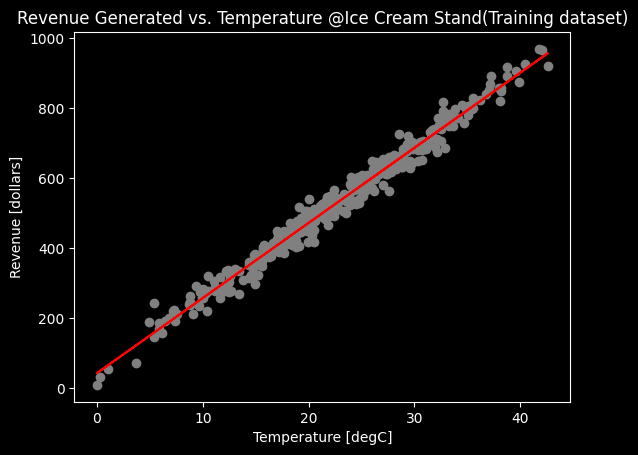

In [70]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

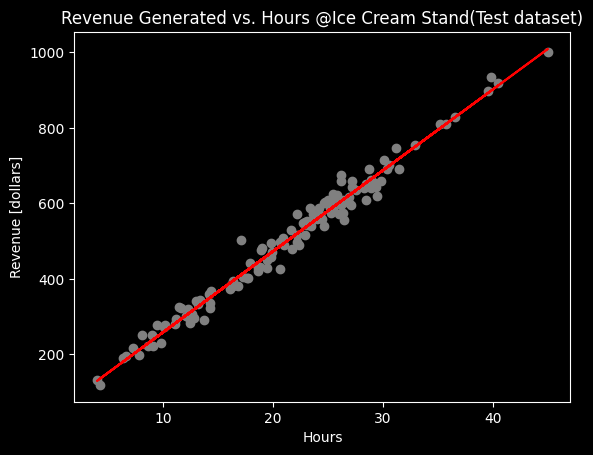

In [71]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')